Le dataset **IMDB Reviews** est une référence en **analyse des sentiments** et est souvent utilisé pour l'entraînement et l'évaluation des modèles de classification de texte.

### **Présentation du dataset IMDB Reviews**
- **Nom** : IMDB Large Movie Review Dataset
- **Taille** : **50 000 critiques de films** (reviews)  
- **Labels** : Sentiments positifs (`1`) ou négatifs (`0`)
- **Format des données** :  
  - Chaque critique est un **fichier texte**.
  - Organisé en **train/test**, avec **25 000 reviews** pour l'entraînement et **25 000 reviews** pour le test.
  - Chaque set contient **12 500 critiques positives** et **12 500 négatives**.
  - Les critiques sont équilibrées : **50% positives, 50% négatives**.

### **Organisation du dataset**
Après extraction, la structure du dataset ressemble à ceci :

```
aclImdb/
│── train/
│   ├── pos/  # 12 500 critiques positives
│   ├── neg/  # 12 500 critiques négatives
│── test/
│   ├── pos/  # 12 500 critiques positives
│   ├── neg/  # 12 500 critiques négatives
```

Chaque fichier texte contient **une critique de film**.


### **Objectif en NLP**
L'objectif principal est de **classifier les critiques en "positives" ou "négatives"** en utilisant des méthodes de **traitement du langage naturel (NLP)**.


### **Exemple d'une critique**
 **Fichier dans `train/pos/` :**

This movie was absolutely amazing! The story was engaging, and the actors delivered fantastic performances. Highly recommend!

 **Label** : `1` (positif)

 **Fichier dans `train/neg/` :**
```
I was really disappointed by this movie. The plot was boring and predictable, and the acting was terrible. Not worth watching.
```
 **Label** : `0` (négatif)


###  **Ce que nous allons faire avec ce dataset**
 
 **I. Exploration des données**
  - Exploration des données : Chargement et affichage des critiques.
  - Analyse de la distribution des sentiments : Répartition équilibrée entre positif/négatif.
  - Statistiques sur les longueurs des critiques : Boxplot et histogramme.
  - WordCloud : Visualisation des mots fréquents en positif et négatif.
  - Corrélation entre longueur et sentiment : Vérifier si les avis positifs sont plus longs.

 **II. Prétraitement des textes**
- **Nettoyage des données** : suppression des balises HTML, des ponctuations, conversion en minuscules.
- **Tokenization** : découpage du texte en mots.
- **Suppression des stopwords** (mots fréquents mais peu informatifs : "the", "is", "and"...).
- **Lemmatisation ou Stemming** : réduire les mots à leur forme de base.

 **III. Modélisation en Machine Learning**
1. **Vectorisation du texte** avec `CountVectorizer`,`TfidfVectorizer`, `Word2Vec`.
2. **Entraînement d'un modèle de classification** :
   - Modèles classiques : **Logistic Regression, Naïve Bayes, SVM, Random Forest**.
   - Modèles avancés : **Word2Vec, GloVe, Transformers (BERT, DistilBERT, etc.)**.


 **IV. Évaluation des performances**
- **Métriques classiques** : Précision, Recall, F1-score, Matrice de confusion.
- **Visualisation des erreurs** : Examiner les avis mal classifiés.

# I. Exploration des données

 ## Étape 1 : Charger et afficher les données

### Importer les bibliothèques

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install wordcloud

In [3]:
from wordcloud import WordCloud

### Fonction pour charger les critiques

In [4]:
def fetch_reviews(path):
    """Récupère les fichiers texte d'un dossier et les stocke dans une liste."""
    data = []
    files = os.listdir(path)
    for file in files:
        with open(os.path.join(path, file), "r", encoding="utf8") as f:
            data.append(f.read())
    return data


### Charger les données

In [5]:
# Charger les reviews en DataFrame
df_train_pos = pd.DataFrame({'review': fetch_reviews('data/aclImdb/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('data/aclImdb/train/neg/'), 'label': 0})
df_test_pos = pd.DataFrame({'review': fetch_reviews('data/aclImdb/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('data/aclImdb/test/neg/'), 'label': 0})

# Fusionner tous les datasets
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)

# Vérifier la taille du dataset
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (50000, 2)


,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


## Étape 2 : Informations générales sur le dataset

### Aperçu rapide des données

In [6]:
# Afficher quelques lignes du DataFrame
df.sample(5)  # Affiche 5 critiques aléatoires

,review,label
26278,I am really surprised that this film only has ...,1
47099,"""The King is Alive"" is a flawed and contrived ...",0
47670,"This ""movie"" and I say this lightly, is nothin...",0
19535,It's very sad that Lucian Pintilie does not st...,0
49019,American Graffiti is one of the best movies ev...,0


- iloc: indexation positionnelle: permet de sélectionner les lignes et les colonnes en utilisant les indices numériques (positions dans le dataframe).
- loc: indexation par label: Permet de sélectionner des lignes et colonnes en utilisant les noms des colonnes et valeurs d'index.

In [7]:
df.loc[df['label']==1,'review'] # Sélectionne toutes les reviews positives

0        Bromwell High is a cartoon comedy. It ran at t...
1        Homelessness (or Houselessness as George Carli...
2        Brilliant over-acting by Lesley Ann Warren. Be...
3        This is easily the most underrated film inn th...
4        This is not the typical Mel Brooks film. It wa...
                               ...                        
37495    I was extraordinarily impressed by this film. ...
37496    Although I'm not a golf fan, I attended a snea...
37497    From the start of "The Edge Of Love", the view...
37498    This movie, with all its complexity and subtle...
37499    I've seen this story before but my kids haven'...
Name: review, Length: 25000, dtype: object

In [8]:
# Lisons une review positive
df[df['label']==1].sample(n=1)['review']

11828    Vaguely reminiscent of great 1940's westerns, ...
Name: review, dtype: object

In [9]:
# Lisons une review positive
#.iloc[0] : Extrait le premier (et unique) élément de cette sélection pour l'afficher directement.
df[df['label']==1].sample(n=1)['review'].iloc[0]

'I absolutely fell in love with "Living in A Big Way" when I first saw it! Reason #1 is because I LOVE, ADORE, and am a HUGE fan of GENE KELLY. He was such a wonderful dancer, actor, and choreographer. Not to mention his extremely handsome looks and his sensual personality. I love his role in this movie. He was such a gentleman. This movie showcased his wonderful talent for acting. I enjoyed Marie MacDonald as well. It was my first time of ever seeing or knowing anything about her, and this excellent movie made me a fan of her\'s as well. Actually, the whole cast in this movie was enjoyable and great. The humor between the butler,"Everette Hanover Smythe", and the father, Mr. Morgan; Mrs. Morgan\'s courtroom humor, and especially grandmother Morgan\'s immediate attachment to, and concern for "LEO GOGARTY." And GENE\'S number "FIDO AND ME" is adorable. The opening dance number with GENE and MARIE is very nice too. I would recommend that anyone see this movie. It will truly remain dear t

In [10]:
df.loc[df['label']==0,'review'] # Sélectionne toutes les reviews négatives

12500    Story of a man who has unnatural feelings for ...
12501    Airport '77 starts as a brand new luxury 747 p...
12502    This film lacked something I couldn't put my f...
12503    Sorry everyone,,, I know this is supposed to b...
12504    When I was little my parents took me along to ...
                               ...                        
49995    I occasionally let my kids watch this garbage ...
49996    When all we have anymore is pretty much realit...
49997    The basic genre is a thriller intercut with an...
49998    Four things intrigued me as to this film - fir...
49999    David Bryce's comments nearby are exceptionall...
Name: review, Length: 25000, dtype: object

In [11]:
# Lisons une review négative
#.iloc[0] : Extrait le premier (et unique) élément de cette sélection pour l'afficher directement.
df[df['label']==0].sample(n=1)['review'].iloc[0]

'What movie is this??? A horrible movie with the old boring concept of infidelity which has already been achieved by the "Bhatt camp". The movie starrs EMRAAN HASHMI, UDITA GOSWAMI AND DINO MOREA. The movie has "No Base". It just goes like this... Dino an Udita are married and living in a rich mansion. However Dino doesn\'t like Udita to the heart as he wants only her wealth. He loves someone else (Tara Sharma). So he bribes Emraan to have an affair with Udita so that he could catch them and finally split up with Udita.. How BORING!! However Emraan falls in love with Udita and vice versa. Lastly when Udita gets imprisonment for killing Emraan, Dino pretentiously tries to save her showing his false love to her. Udita on the other hand does not understand this and feels that he loved her truly. So she lends all her wealth to Dino. Finally Dino comes out of the police - station and goes with Tara with all the wealth. What a fraud!! The songs are good and are the only thing good in the mov

### Vérifier les valeurs manquantes

In [12]:
# Vérifier si des valeurs sont manquantes
df.isnull().sum()

review    0
label     0
dtype: int64

In [13]:
# Y-a-t'il des reviews vides?
df['review'].isnull().sum()

0

### Distribution des labels (sentiments)

In [14]:
# Combien de reviews positives et négatives?
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])

Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000


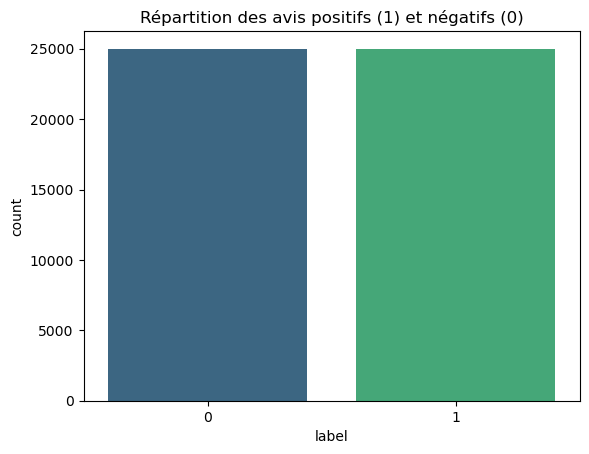

In [15]:
# Affichage de la répartition des classes
sns.countplot(x=df['label'], palette="viridis")
plt.title("Répartition des avis positifs (1) et négatifs (0)")
plt.show()

## Étape 3 : Analyse des longueurs de critiques

Analysons combien de mots contiennent en moyenne les critiques.

 ### Nombre de mots par review

In [16]:
#word_count = df['word_count'] = df['review'].apply(lambda x: len(x.split()))
word_count = df['review'].apply(lambda x: len(x.split()))
word_count

0        140
1        428
2        147
3        124
4        120
        ... 
49995    108
49996    163
49997    268
49998    126
49999    388
Name: review, Length: 50000, dtype: int64

### Statistiques sur la longueur des critiques

In [17]:
print(word_count.describe())

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64


**Interprétation des résultats :**

Résumé des statistiques descriptives du nombre de mots par review :

Statistique	Valeur	Interprétation

- count	50000	: **Nombre total de reviews analysées**

- mean	231.16	: **Une review contient en moyenne 231 mots**

- std	171.34	: **L'écart-type est élevé, donc il y a une grande variation entre les reviews**

- min	4	: **La review la plus courte contient 4 mots**

- 25%	126	: **25% des reviews contiennent moins de 126 mots**

- 50% (médiane)	173	: **La moitié des reviews contiennent moins de 173 mots**

- 75%	280	: **75% des reviews contiennent moins de 280 mots**

- max	2470	: **La review la plus longue contient 2470 mots**


**La plupart des reviews sont de taille moyenne**

   - La médiane (50%) est de 173 mots, ce qui signifie que la moitié des critiques contiennent entre 4 et 173 mots et l'autre moitié contient entre 173 et 2470 mots.
   - La moyenne est de 231 mots, ce qui montre qu'en général, les critiques sont relativement longues.
**Interprétation :**
- La majorité des utilisateurs prennent le temps d’écrire des critiques détaillées, ce qui est utile pour une analyse de sentiment plus fine.


**Forte variabilité dans la longueur des reviews**

  - L'écart-type (std) de 171 mots montre qu'il y a une grande dispersion dans la longueur des critiques.
  - L'intervalle interquartile (IQR) [126 - 280 mots] indique que 50% des reviews ont une longueur comprise entre ces valeurs.
  - Quelques reviews sont extrêmement courtes (4 mots minimum), tandis que d'autres sont très longues (jusqu'à 2470 mots).

**Interprétation :**
 Il existe deux types principaux de critiques :
- Des courtes (≤ 126 mots) : Probablement des avis rapides, simples, ou même des spams.
- Des longues (> 280 mots) : Des critiques détaillées, où l'utilisateur exprime en profondeur son opinion sur le film.

### Étape 5 : Corrélation entre la longueur et le sentiment

Voyons si les critiques positives ou négatives ont tendance à être plus longues ou plus courtes.

### Longueur moyenne des critiques par sentiment

In [18]:
#df.groupby("label")["word_count"].mean()

- Ce sont des résultats assez similaires, ce qui suggère qu'il n'y a pas de différence notable en termes de longueur entre les critiques positives et négatives.

### Visualisation avec un boxplot

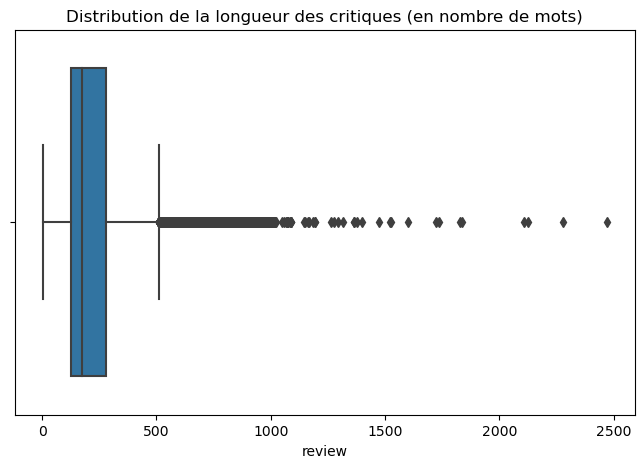

In [19]:
plt.figure(figsize=(8,5))
#sns.boxplot(x=df['word_count'])
sns.boxplot(x=word_count)
plt.title("Distribution de la longueur des critiques (en nombre de mots)")
plt.show()

In [20]:
seuils = [10, 20, 30, 40, 50, 100, 125]
for s in seuils:
    print(f"Nombre de reviews avec moins de {s} mots : {(word_count < s).sum()}")

Nombre de reviews avec moins de 10 mots : 5
Nombre de reviews avec moins de 20 mots : 27
Nombre de reviews avec moins de 30 mots : 106
Nombre de reviews avec moins de 40 mots : 382
Nombre de reviews avec moins de 50 mots : 1152
Nombre de reviews avec moins de 100 mots : 6017
Nombre de reviews avec moins de 125 mots : 11867


### Histogramme de la distribution des longueurs
Visualiser la distribution des longueurs de reviews avec un histogramme :

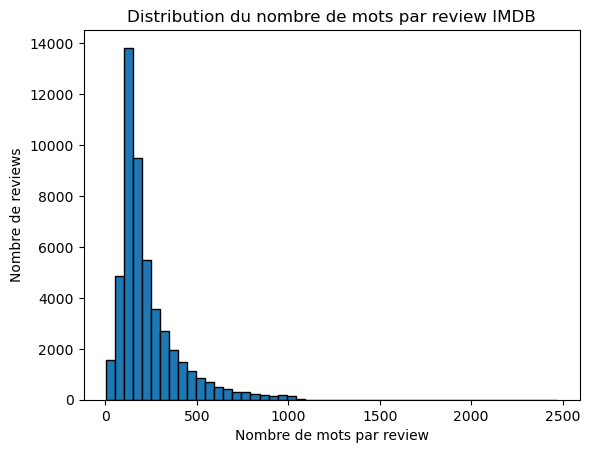

In [21]:
import matplotlib.pyplot as plt

plt.hist(word_count, bins=50, edgecolor='black')
plt.xlabel("Nombre de mots par review")
plt.ylabel("Nombre de reviews")
plt.title("Distribution du nombre de mots par review IMDB")
plt.show()

### Explorer les reviews extrêmes (très courtes ou très longues) :

In [22]:
print("Review la plus courte :\n", df.loc[word_count.idxmin(), 'review'])
print("\nReview la plus longue :\n", df.loc[word_count.idxmax(), 'review'])

Review la plus courte :
 Primary plot!Primary direction!Poor interpretation.

Review la plus longue :
 Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem th

In [23]:
nb_reviews = ((word_count >= 50) & (word_count <= 500)).sum()
print(f"Nombre de reviews entre 50 et 500 mots : {nb_reviews}")

Nombre de reviews entre 50 et 500 mots : 44945


In [24]:
nb_reviews = ((word_count >= 30) & (word_count <= 1000)).sum()
print(f"Nombre de reviews entre 30 et 1000 mots : {nb_reviews}")

Nombre de reviews entre 30 et 1000 mots : 49812


In [25]:
df_filtered= df[(word_count > 30) & (word_count < 1000)]
print(f"Nombre de reviews après filtrage : {df_filtered.shape[0]}")

Nombre de reviews après filtrage : 49781


# II. Prétraitement des données 

### **Pourquoi faire du prétraitement ?**
Les données textuelles brutes contiennent souvent des éléments inutiles pour l'analyse de sentiment. Un bon nettoyage améliore la qualité des données et aide les modèles à mieux apprendre.

Voici les différentes étapes que nous allons appliquer :


### **1. Suppression des tags HTML**
- Certains avis peuvent contenir du HTML (`<br>`, `<p>`, etc.), surtout si les données proviennent du web.
- Ces tags n'apportent rien à l'analyse et doivent être supprimés.


### **2. Conservation des mots uniquement (suppression de la ponctuation et des chiffres)**
- Les chiffres et la ponctuation (`.,!?;:`) ne sont pas utiles dans l'analyse de sentiment.
- On remplace tout ce qui n'est pas une lettre (`A-Z a-z`) par un espace.


### **3. Passage en minuscule**
- Le modèle ne doit pas faire de différence entre "Excellent" et "excellent".
- On met tout en **minuscule** pour uniformiser le texte.


### **4. Tokenization (facultatif)**
- La **tokenization** consiste à découper le texte en **mots** (tokens).
- Cela permet d'analyser chaque mot séparément et facilite l'étape de lemmatisation.


### **5. Lemmatisation**
- La **lemmatisation** consiste à ramener un mot à sa racine (forme canonique).
  - Exemples :  
    - *running* → *run*
    - *better* → *good*
- Cela réduit la variabilité et aide le modèle à généraliser.


### **6. Réassemblage des reviews**
- Après le nettoyage, les mots peuvent être réassemblés pour reformer une version propre de la critique.


In [26]:
import re
import nltk
nltk.download('punkt') # At first you have to download these nltk packages.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


- **Suppression de "not" des stopwords** : Cela permet de conserver les négations (not good, not bad), qui peuvent être importantes pour l'analyse des sentiments. Enlever "not" peut fausser la signification d'une phrase.
- re.sub('[^A-Za-z0-9]+', ' ', review): On remplace tout ce qui n'est pas une lettre ou un chiffre (A-Z a-z 0-9) par un espace.

In [27]:
stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # data cleaning
  review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
  review = review.lower()
  
  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
  review = ' '.join(review)
  
  return review

In [28]:
# On applique le pré-traitement à nos données
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

,review,label,preprocessed_review
0,Bromwell High is a cartoon comedy. It ran at t...,1,bromwell high cartoon comedy ran time program ...
1,Homelessness (or Houselessness as George Carli...,1,homelessness houselessness george carlin state...
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,brilliant acting lesley ann warren best dramat...
3,This is easily the most underrated film inn th...,1,easily underrated film inn brook cannon sure f...
4,This is not the typical Mel Brooks film. It wa...,1,not typical mel brook film much le slapstick m...


## **Visualisation des mots les plus fréquents avec un WordCloud**  

Un **WordCloud** (nuage de mots) est une manière visuelle d’explorer les mots les plus fréquents dans un texte. Plus un mot apparaît souvent dans les critiques, plus il est affiché en **gros** dans le nuage.  

L’objectif est d’avoir un aperçu rapide des termes les plus utilisés dans les critiques **positives** et **négatives** :  
- Dans les **critiques positives**, on peut s’attendre à voir des mots comme *great*, *amazing*, *love*, *best*, etc.  
- Dans les **critiques négatives**, on peut voir des mots comme *bad*, *worst*, *boring*, *disappointed*, etc.  

### **Pour les reviews positives**

In [29]:
#On filtre les reviews positives (label == 1).
#On utilise .unique().tolist() pour récupérer des critiques uniques sous forme de liste.
#pos_words = " ".join(words_list): On fusionne toutes les critiques en une seule chaîne de texte.
#On enlève les stopwords pour éviter les mots trop courants.
#generate(pos_words) crée l’image du WordCloud.
#On affiche l’image sans axe et sans marges (tight_layout(pad=0)).
#imshow() permet de visualiser le WordCloud.

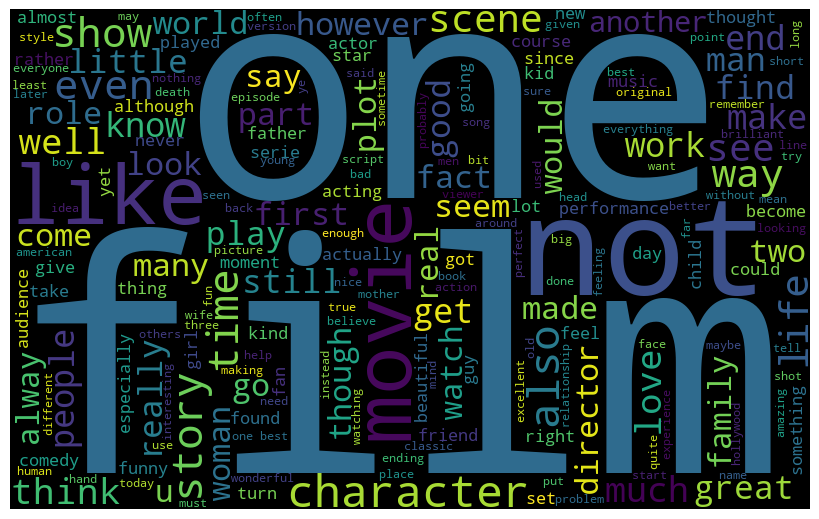

In [30]:
from wordcloud import WordCloud

words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### ** Etendre la liste des stopwords ?**  

Les **stopwords** sont des mots très courants qui n'apportent pas de valeur significative pour l'analyse de texte (ex. "the", "is", "and"). Par défaut, NLTK fournit une liste de stopwords, mais elle peut ne pas être adaptée à notre cas.  

Dans le contexte de l'analyse des critiques de films (**sentiment analysis sur IMDB**), certains mots comme **"film", "movie", "one", "time", "also"** sont très fréquents dans les critiques, mais ils **n'apportent pas d'informations sur le sentiment** (positif/négatif).  

#### **Pourquoi retirer ces mots du WordCloud ?**
1. **Ils sont trop génériques** → "movie" et "film" apparaissent dans presque toutes les critiques, donc ils **dominent** le WordCloud sans apporter d'intérêt.
2. **Ils biaisent l’interprétation** → Si le WordCloud est rempli de "movie", "film", "one", "time", on ne verra pas les mots réellement liés à des avis positifs ou négatifs.
3. **Mise en valeur des mots vraiment importants** → En les supprimant, on fait ressortir **les adjectifs et verbes** qui traduisent mieux les sentiments (ex. "amazing", "boring", "love", "hate").

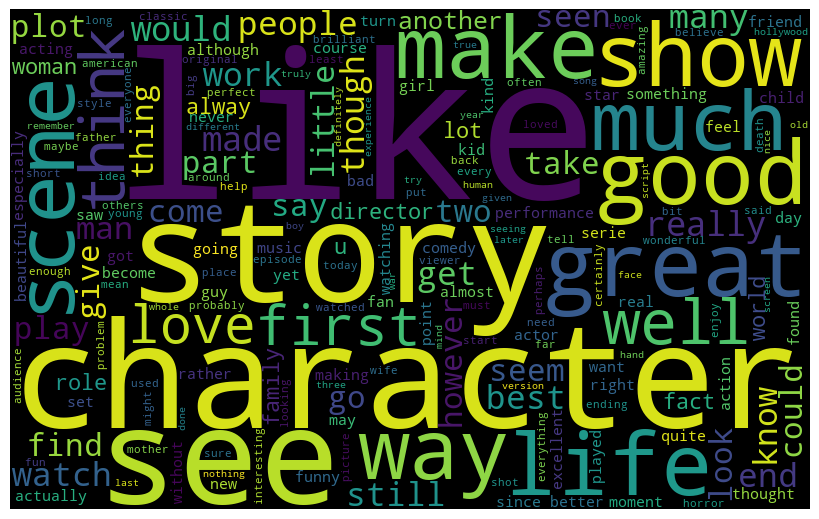

In [31]:
# On peut ajuster les stop words
my_stop_words = stop_words
my_stop_words.extend(['film', 'not', 'one', 'time', 'also', 'movie', 'even'])

pos_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=my_stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### **Pour les reviews négatives**

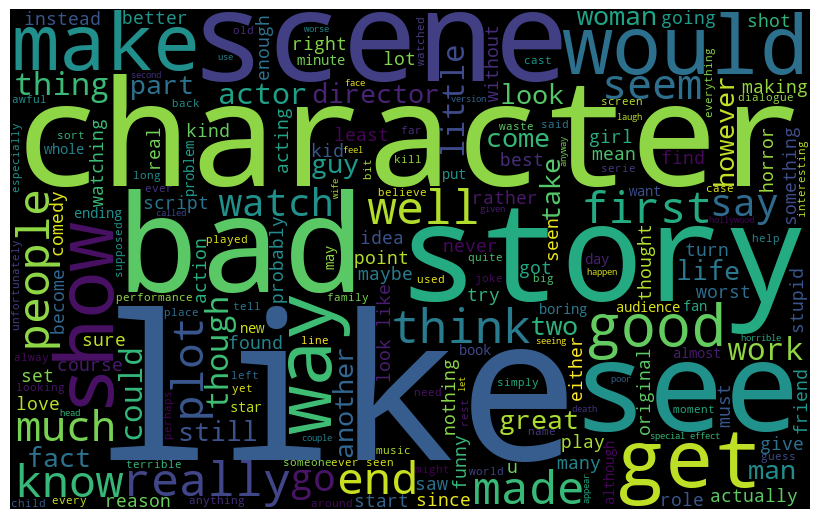

In [32]:
from wordcloud import WordCloud

words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

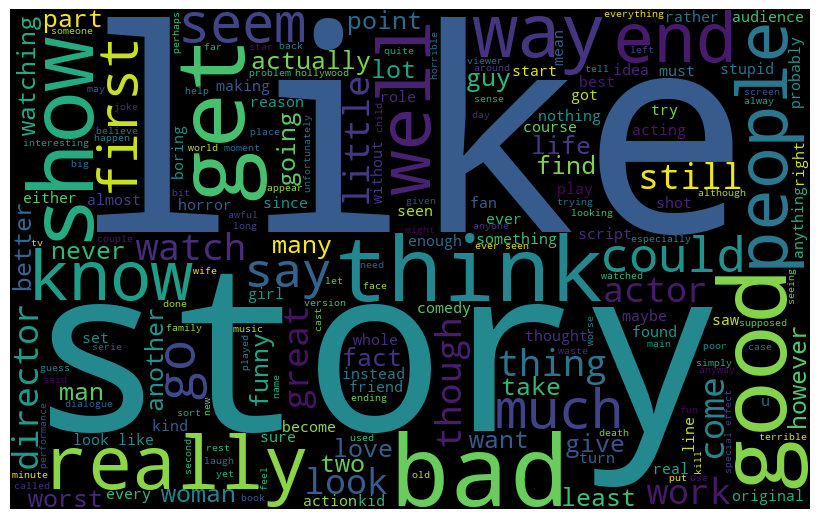

In [33]:
# On peut ajuster les stop words
my_stop_words = stop_words
my_stop_words.extend(['character', 'make', 'scene', 'see', 'would', 'made', 'plot'])

neg_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=my_stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# III. Modélisation en Machine Learning 

## Séparation des données en train/test

On divise le dataset en deux parties :

   - Données d'entraînement (train) : utilisées pour apprendre les modèles.
   - Données de test (test) : utilisées pour évaluer les performances du modèle sur des données nouvelles.

In [34]:
df

,review,label,preprocessed_review
0,Bromwell High is a cartoon comedy. It ran at t...,1,bromwell high cartoon comedy ran time program ...
1,Homelessness (or Houselessness as George Carli...,1,homelessness houselessness george carlin state...
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,brilliant acting lesley ann warren best dramat...
3,This is easily the most underrated film inn th...,1,easily underrated film inn brook cannon sure f...
4,This is not the typical Mel Brooks film. It wa...,1,not typical mel brook film much le slapstick m...
...,...,...,...
49995,I occasionally let my kids watch this garbage ...,0,occasionally let kid watch garbage understand ...
49996,When all we have anymore is pretty much realit...,0,anymore pretty much reality tv show people mak...
49997,The basic genre is a thriller intercut with an...,0,basic genre thriller intercut uncomfortable me...
49998,Four things intrigued me as to this film - fir...,0,four thing intrigued film firstly star carly p...


In [35]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (35000, 2) (35000,)
Test data: (15000, 2) (15000,)


## Vectorisation 

Les algorithmes de Machine Learning ne peuvent pas traiter directement du texte brut, donc il faut transformer les critiques en données numériques. Pour cela, on utilise des techniques de vectorisation, qui convertissent un texte en un vecteur de nombres exploitables par un modèle.
Nous allons comparer trois méthodes courantes de vectorisation :

  - CountVectorizer (Bag of Words - BOW)
  - TF-IDF (Term Frequency - Inverse Document Frequency)
  - Word2Vec (Word Embedding)

## 1. CountVectorizer (Bag of Words - BOW)

Le CountVectorizer est une méthode de sac de mots (Bag of Words - BOW) qui convertit un texte en un vecteur basé sur la fréquence des mots dans le corpus.

Principe :

  - Chaque mot unique du corpus devient une colonne dans une matrice.
  - Chaque critique est représentée par un vecteur où chaque case contient le nombre d’occurrences du mot correspondant.
  - Pas de prise en compte du contexte ou de l’ordre des mots.

Transformation du corpus :

   - On extrait les mots uniques du corpus et on les considère comme des caractéristiques (features).
   - Chaque phrase est transformée en un vecteur de fréquences de ces mots.
   
 **Avantages :**

   - Simple et efficace pour des textes courts.
   - Facile à interpréter.

**Inconvénients :**

   - Ignore le sens et le contexte des mots.
   - Augmente la taille de la matrice si le vocabulaire est grand (beaucoup de colonnes).

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=10)

# Entraînement du vectorizer sur les données d'entraînement et transformation en une matrice de fréquence des mots
X_train_review_bow = vect.fit_transform(X_train['preprocessed_review'])

#Il utilise le même vocabulaire appris sur X_train pour convertir X_test en une matrice de fréquences.
X_test_review_bow = vect.transform(X_test['preprocessed_review'])

#Si un mot dans X_test n’était pas présent dans X_train, il est ignoré (car il n’a pas d’index dans le vocabulaire).
#Cela garantit que X_train_review_bow et X_test_review_bow ont le même nombre de colonnes (même vocabulaire), ce qui est essentiel pour entraîner un modèle de Machine Learning.

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (35000, 19506)
X_test_review_bow shape:  (15000, 19506)


### Calcul de la sparsité de la matrice

Lorsqu'on utilise CountVectorizer, on transforme nos textes en matrices creuses (ou sparse matrices en anglais). Cette notion de sparsité est importante à comprendre, car elle a un impact sur l'efficacité et la performance des modèles.

 - X_train_review_bow est un objet sparse matrix (matrice creuse).
 - .todense() le convertit en une matrice dense (classique) pour pouvoir compter les valeurs facilement.

**Les matrices creuses sont utilisées pour économiser de la mémoire et accélérer les calculs.**

- La fonction count_nonzero() compte le nombre d’éléments non nuls dans la matrice.
- X_train_review_bow.todense().size donne le nombre total de cellules dans la matrice.

- Si nb_nonZero / my_size est proche de 0, la matrice est très creuse (peu de mots différents dans chaque document).
- Une forte sparsité (> 90%) signifie que la majorité des cellules sont des zéros.

**Pourquoi c'est important ?**

**Optimisation mémoire :**

   - Stocker 50 000 000 valeurs dans une matrice dense prend beaucoup de RAM.
   - Les sparse matrices permettent de ne stocker que les valeurs non nulles, économisant de la mémoire.

**Performance :**

   - Les modèles de Machine Learning et NLP sont plus rapides avec des matrices creuses.
   - Scikit-learn optimise les algorithmes pour travailler directement avec ces matrices.

**Impact sur le choix des modèles :**

   - Certains modèles (ex: Naive Bayes, SVM) fonctionnent bien avec des matrices creuses.
   - D’autres (ex: réseaux de neurones) nécessitent parfois une réduction de dimension avant.

In [37]:
from numpy import count_nonzero

nb_nonZero = count_nonzero(X_train_review_bow.todense())
my_size = float(X_train_review_bow.todense().size)
print("Nombre d'éléments non nuls : ", nb_nonZero)
print("Nombre d'éléments : ", my_size)
print("Sparsité : ", 1-(nb_nonZero/my_size))

Nombre d'éléments non nuls :  3226834
Nombre d'éléments :  682710000.0
Sparsité :  0.9952734924052672


 **Sparsité : 99.55%** ➝ La matrice est **extrêmement creuse !**  

Cela signifie que **seulement 0.45% des valeurs sont non nulles**, et **99.55% des entrées sont des zéros**.  

### **Conséquences :**  
1. **Mémoire & Performance** : Stocker une matrice aussi creuse sous forme classique gaspille beaucoup de mémoire. On utilise donc une **représentation sparse** (ex: format CSR en `scipy.sparse`) pour optimiser l'espace et les calculs.  
2. **Impact sur les modèles** :  
   - **Algorithmes sensibles** aux matrices creuses :  
     - Réseaux de neurones (peinent avec trop de zéros).  
     - KNN (distance dominée par les 0).  
   - **Algorithmes adaptés** aux matrices creuses :  
     - **Naïve Bayes**, **SVM linéaire**, **Random Forest** fonctionnent bien.  
3. **Alternatives** :  
   - **Réduction de dimensions** (ex: PCA, Truncated SVD, LSA) pour compresser l'information.  
   - **Techniques avancées** (ex: Word2Vec, TF-IDF avec réduction) pour rendre la représentation plus dense.  

 **Conclusion** : BoW produit une matrice avec **énormément de zéros**, ce qui est normal en NLP. Mais pour des modèles plus avancés, il faudra peut-être **réduire la dimensionnalité** ou tester **d'autres techniques de vectorisation**.

## 2. TF-IDF (Term Frequency - Inverse Document Frequency)

Le TF-IDF améliore le CountVectorizer en attribuant un poids à chaque mot, en tenant compte de son importance dans l’ensemble du corpus.
Principe :

   - Term Frequency (TF) : fréquence d’un mot dans un document.
   - Inverse Document Frequency (IDF) : pénalise les mots trop fréquents dans tout le corpus (ex. "the", "is") et en augmentant celle des mots plus spécifiques.
   - Le score TF-IDF est le produit TF × IDF.

### **Le TF-IDF (Term Frequency - Inverse Document Frequency)**  

Le **TF-IDF** est une méthode de vectorisation du texte qui évalue **l’importance d’un mot** dans un document **par rapport à l’ensemble des documents**. Il est largement utilisé dans l’analyse de texte et le Machine Learning, notamment pour **la classification de texte**, **la recherche d’information** et **l’extraction de mots-clés**.


## ** Principe du TF-IDF**
Le **TF-IDF** est composé de deux parties :  

1. **TF (Term Frequency) : Fréquence du terme dans le document**  
   → Mesure **la fréquence d’un mot** dans un document spécifique.  
   
2. **IDF (Inverse Document Frequency) : Fréquence inverse du document**  
   → Mesure **l’importance du mot** à travers tous les documents du corpus.  
   → **Un mot trop fréquent est moins important !**  

L’idée est que :  
 **Un mot fréquent dans un document a un score élevé** (**TF**).  
 **Un mot fréquent dans tous les documents est moins informatif** (**IDF**).  

🔹 **Exemple intuitif :**  
- Dans un corpus de critiques de films, les mots comme **"movie"**, **"the"** ou **"film"** apparaissent **dans presque tous les documents**, donc ils ne sont **pas pertinents** pour différencier les critiques.
- En revanche, les mots comme **"excellent"**, **"boring"** ou **"horrible"** sont plus spécifiques à certaines critiques et sont donc **plus significatifs**.


## ** Calcul détaillé du TF-IDF**

### ** Calcul du Term Frequency (TF)**  
Le **TF** mesure **combien de fois un mot apparaît dans un document** par rapport à la longueur du document.  


TF(t,d) = f(t,d)/sum(f(t',d))


Avec :  
- f(t,d) = nombre d’occurrences du mot \( t \) dans le document \( d \).  
- sum(f(t',d)) = total des mots dans le document \( d \).  

 **Exemple :**  
Si un document contient **100 mots** et que le mot "excellent" apparaît **5 fois**, alors :  

TF(excellent) = 5/100 = 0.05



### **2. Calcul de l’Inverse Document Frequency (IDF)**  
L’**IDF** mesure combien de documents contiennent le mot \( t \). Plus un mot est fréquent dans **tous les documents**, plus son poids est **réduit**.


IDF(t) = log(N / (1 + DF(t)))


Avec :  
- \( N \) = nombre total de documents.  
- \( DF_t \) = nombre de documents contenant le mot \( t \).  
- \( +1 \) est ajouté pour éviter une division par zéro (si un mot n’apparaît dans aucun document).  

 **Exemple :**  
Si notre corpus contient **5 documents** et que le mot "excellent" apparaît **dans 2 documents**, alors :  


IDF(excellent) = log(5/ (1 + 2) ) = 0.22


En revanche, si un mot comme "the" est présent **dans tous les documents**, son IDF devient proche de **0**, réduisant son importance.


### **3. Calcul final du TF-IDF**  
On obtient le **score TF-IDF** en multipliant **TF et IDF** :

TF-IDF(t,d) = TF(t,d) * IDF(t)


**Exemple :**  
Si **TF("excellent") = 0.05** et **IDF("excellent") = 0.22**, alors :  

TF-IDF(\text{excellent}) = 0.05*0.22 = 0.011


## ** Exemple complet sur un corpus**
Imaginons **3 critiques de films** :

 **"This movie is fantastic! The acting was great and the story was amazing."**  
 **"The movie was good, but the story was predictable and the acting was average."**  
 **"The movie was terrible. The acting was horrible and the story made no sense."**  

#### **Étape 1 : Matrice TF**
| Mots uniques   | movie | acting | story | fantastic | great | good | bad | terrible | horrible | amazing |
|---------------|------|--------|------|----------|------|----|----|---------|----------|--------|
| **Critique 1** | 1    | 1      | 1    | 1        | 1    | 0  | 0  | 0       | 0        | 1      |
| **Critique 2** | 1    | 1      | 1    | 0        | 0    | 1  | 0  | 0       | 0        | 0      |
| **Critique 3** | 1    | 1      | 1    | 0        | 0    | 0  | 1  | 1       | 1        | 0      |

#### **Étape 2 : Calcul IDF**
| Mots uniques   | movie | acting | story | fantastic | great | good | bad | terrible | horrible | amazing |
|---------------|------|--------|------|----------|------|----|----|---------|----------|--------|
| **IDF**       | 0.0  | 0.0    | 0.0  | 0.69     | 0.69 | 0.69 | 0.69 | 0.69    | 0.69     | 0.69  |

 **Remarque :**  
- "movie", "acting" et "story" apparaissent **dans tous les documents**, donc leur IDF = **0**.  
- "fantastic", "horrible", "terrible" apparaissent **dans un seul document**, donc IDF > 0.  

#### **Étape 3 : Calcul du TF-IDF**
On multiplie chaque case de la matrice TF par l’IDF correspondant.


## **Avantages et inconvénients du TF-IDF**
 **Avantages :**  
- Réduit l’importance des mots courants (ex. "the", "movie").  
- Met en valeur les **mots spécifiques** à un document.  
-  Méthode simple et efficace pour la recherche d’information et la classification de texte.  

 **Inconvénients :**  
- Ne prend pas en compte **l’ordre des mots**.  
- Ne capture pas **les relations sémantiques** entre les mots (contrairement à Word2Vec).  
- Sensible au **bruit** (si un mot rare apparaît une seule fois, il aura un score élevé même s’il n’est pas pertinent).  


## **Quand utiliser TF-IDF ?**
 **Recherche d’informations** (ex. moteur de recherche Google).  
 **Classification de texte** (ex. analyse de sentiments).  
 **Extraction de mots-clés** (ex. résumé automatique d’articles).  


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (35000, 19506)
X_test_review_tfidf shape:  (15000, 19506)


Le paramètre **min_df=10** dans TfidfVectorizer signifie que les mots apparaissant dans moins de 10 documents seront ignorés.

## Word2Vec (Word Embedding - Plongement de mots)

Le Word2Vec est une approche avancée qui permet de capturer le sens et les relations sémantiques entre les mots.
Principe :

   - Utilise des réseaux de neurones pour apprendre des vecteurs continus représentant chaque mot.
   - Deux méthodes principales :
        - CBOW (Continuous Bag of Words) : prédit un mot à partir de son contexte.
        - Skip-gram : prédit le contexte à partir d’un mot.

Exemple :

Après entraînement, les mots ayant un sens similaire auront des vecteurs proches.

    king - man + woman ≈ queen
    great ≈ fantastic
    horrible ≈ terrible

 Effet :

   - Permet de capturer les relations de sens entre les mots.
   - Contrairement aux méthodes précédentes, les mots similaires auront des représentations proches dans l’espace vectoriel.

**Avantages:**

 - Capture le sens et les relations entre les mots.
 - Permet d’effectuer des opérations sur les mots.

**Inconvénients:**

 - Nécessite beaucoup de données pour être efficace.
 - Plus complexe à entraîner que les autres méthodes.

Word2Vec génère des vecteurs pour chaque mot, en tenant compte de leur contexte, alors que CountVectorizer et TF-IDF génèrent des vecteurs pour des documents entiers sans information sur le sens des mots.

   - Avec CountVectorizer et TF-IDF : On ne sait pas si deux mots comme "bon" et "excellent" sont proches en sens.
   - Avec Word2Vec : Les mots ayant des significations similaires auront des vecteurs proches !
   - **Contrairement à CountVectorizer et TF-IDF, qui représentent les textes sous forme de matrices creuses (bag-of-words), Word2Vec génère des représentations denses de mots sous forme de vecteurs continus.**

### Etape 1: Préparation des Données pour Word2Vec

Avant d’entraîner le modèle, il faut tokeniser nos reviews pour obtenir une liste de mots.

In [39]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

# Tokenisation des reviews
X_train_tokens_W2V = [nltk.word_tokenize(review) for review in X_train['preprocessed_review']]
X_test_tokens_W2V = [nltk.word_tokenize(review) for review in X_test['preprocessed_review']]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PATRICIA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Étape 2 : Entraîner le modèle Word2Vec

- Gensim est une bibliothèque Python spécialisée dans le traitement du langage naturel (NLP). Elle est souvent utilisée pour des tâches comme : Word2Vec (générer des vecteurs pour les mots)
- Dans Gensim, model.wv est un dictionnaire de vecteurs où chaque mot est associé à son vecteur appris.

In [40]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=X_train_tokens_W2V,   # Données tokenisées
                     vector_size=100,           # Chaque mot = vecteur de 100 dimensions
                     window=5,                  # Contexte de 5 mots avant et après
                     min_count=5,               # Ignore les mots apparaissant moins de 5 fois dans le corpus
                     workers=4)                 # Utilise 4 cœurs pour accélerer l'entrainement(cpu)


In [41]:
import multiprocessing
print(multiprocessing.cpu_count())  # Affiche le nombre de cœurs disponibles

8


### Etape 3 : Transformation des Reviews en Vecteurs

Word2Vec génère des vecteurs pour chaque mot, mais nos modèles de Machine Learning nécessitent un vecteur unique pour chaque review. On peut faire la moyenne des vecteurs des mots dans chaque review.

In [42]:
""" """ 
import numpy as np

# Fonction pour transformer une review en un vecteur moyen de mots
def vectorize_review_W2V(review, model, vector_size):
    vectors = [model.wv[word] for word in review if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Transformation des reviews
X_train_review_w2v = np.array([vectorize_review_W2V(review, w2v_model, 100) for review in X_train_tokens_W2V])
X_test_review_w2v = np.array([vectorize_review_W2V(review, w2v_model, 100) for review in X_test_tokens_W2V])

print("X_train_w2v shape:", X_train_review_w2v.shape)
print("X_test_w2v shape:", X_test_review_w2v.shape)


X_train_w2v shape: (35000, 100)
X_test_w2v shape: (15000, 100)


# Entrainement des différents modèles de classification:

On va comparer 4 algorithmes de Machine Learning pour classer les reviews IMDB en positives ou négatives :

- Logistic Regression
- Naïve Bayes (MultinomialNB)
- Support Vector Machine (SVM) - Linear Kernel
- Random Forest

Pourquoi ces modèles ?

**1. Logistic Regression**

   - Simple et efficace pour les problèmes de classification binaire.
   - Fonctionne bien quand les features sont bien séparables.
   - Donne des probabilités (utile pour interpréter la confiance d'une prédiction).

**2. Naïve Bayes (MultinomialNB)**

   - Très rapide et idéal pour le NLP.
   - Suppose que les mots sont indépendants dans un texte (hypothèse naïve).
   - Fonctionne bien quand les données suivent une distribution multinomiale (comme les fréquences de mots).

**3. SVM (Support Vector Machine) - Kernel Linéaire**

   - Recherche l'hyperplan optimal pour séparer les classes.
   - Fonctionne bien avec des données très dimensionnelles (comme les vecteurs TF-IDF).
   - Le kernel linéaire est rapide et efficace pour le NLP.

**4. Random Forest**

   - Algorithme basé sur des arbres de décision.
   - Très robuste, réduit le surapprentissage grâce à un ensemble de plusieurs arbres.
   - Peut gérer des relations complexes entre les mots.

## Modèle Logistic Regression

- CountVectorizer

In [43]:
# Entraînement sur les données BoW (CountVectorizer)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
log_reg_bow = LogisticRegression(max_iter=1000)
log_reg_bow.fit(X_train_review_bow, y_train)

# Prédiction sur le test set
y_pred_bow = log_reg_bow.predict(X_test_review_bow)

# Évaluation des performances
print("Logistic Regression avec CountVectorizer")
print("Accuracy LR-BOW:", accuracy_score(y_test, y_pred_bow))
print("Classification Report LR-BOW:\n", classification_report(y_test, y_pred_bow))


Logistic Regression avec CountVectorizer
Accuracy LR-BOW: 0.8770666666666667
Classification Report LR-BOW:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      7500
           1       0.88      0.88      0.88      7500

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



- Avec TF-IDF

In [44]:
# Initialisation du modèle
log_reg_tfidf = LogisticRegression(max_iter=1000)

# Entraînement sur les données TF-IDF
log_reg_tfidf.fit(X_train_review_tfidf, y_train)

# Prédiction sur le test set
y_pred_tfidf = log_reg_tfidf.predict(X_test_review_tfidf)

# Évaluation des performances
print("Logistic Regression avec TF-IDF ")
print("Accuracy LR-TF-IDF:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report LR-TF-IDF:\n", classification_report(y_test, y_pred_tfidf))


Logistic Regression avec TF-IDF 
Accuracy LR-TF-IDF: 0.8893333333333333
Classification Report LR-TF-IDF:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      7500
           1       0.88      0.90      0.89      7500

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



- LR Word2Vec

In [45]:
# Entraînement du modèle
log_reg_w2v = LogisticRegression(max_iter=1000)
log_reg_w2v.fit(X_train_review_w2v, y_train)

# Prédiction sur le test set
y_pred_w2v = log_reg_w2v.predict(X_test_review_w2v)

# Évaluation des performances
print("Logistic Regression avec Word2Vec")
print("Accuracy LR-W2V:", accuracy_score(y_test, y_pred_w2v))
print("Classification Report LR-W2V:\n", classification_report(y_test, y_pred_w2v))

Logistic Regression avec Word2Vec
Accuracy LR-W2V: 0.8608
Classification Report LR-W2V:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      7500
           1       0.86      0.87      0.86      7500

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [ ]:
#Désactive les avertissements (warnings) Python.
import warnings
warnings.filterwarnings('ignore')

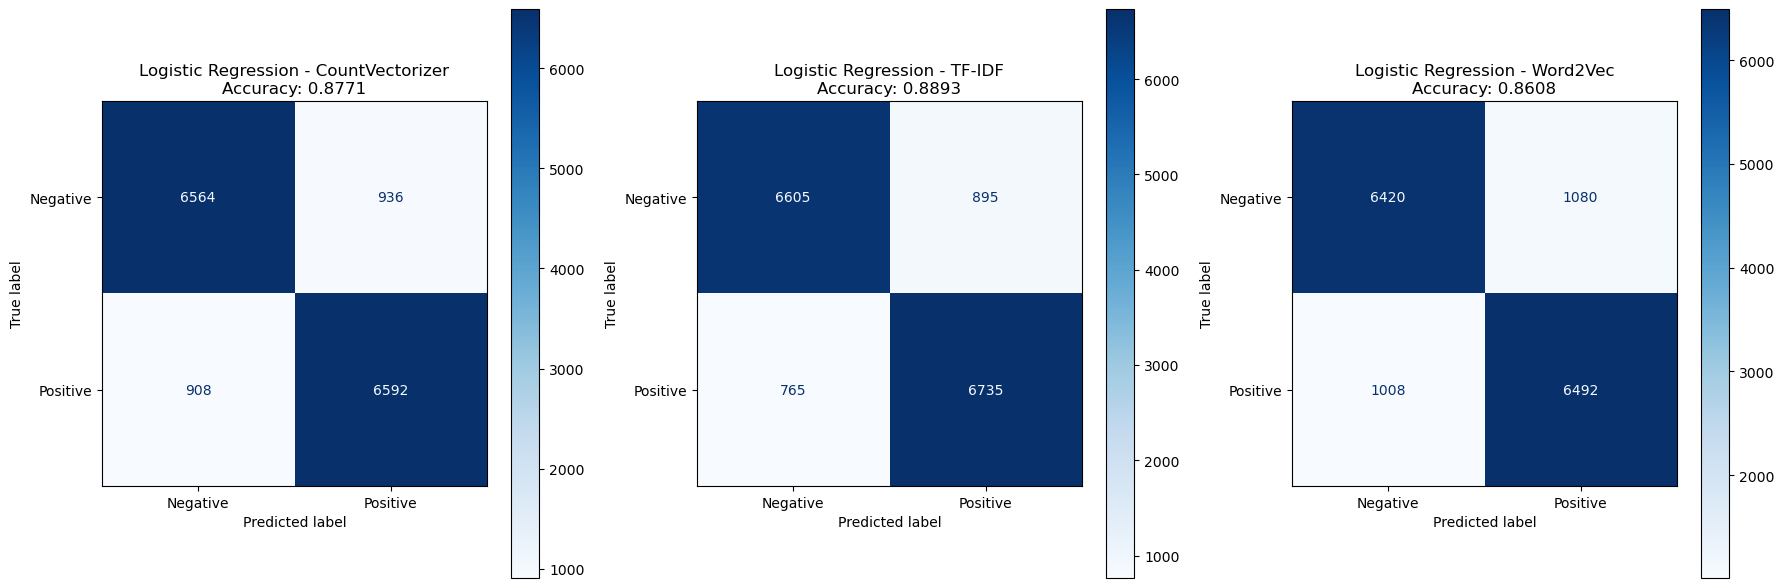

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np

# Initialisation des modèles
log_reg_bow = LogisticRegression(max_iter=1000)
log_reg_tfidf = LogisticRegression(max_iter=1000)
log_reg_w2v = LogisticRegression(max_iter=1000)

# Entraînement des modèles
log_reg_bow.fit(X_train_review_bow, y_train)
log_reg_tfidf.fit(X_train_review_tfidf, y_train)
log_reg_w2v.fit(X_train_review_w2v, y_train)

# Prédiction sur les données de test
y_pred_bow = log_reg_bow.predict(X_test_review_bow)
y_pred_tfidf = log_reg_tfidf.predict(X_test_review_tfidf)
y_pred_w2v = log_reg_w2v.predict(X_test_review_w2v)

# Calcul des matrices de confusion
cm_bow = confusion_matrix(y_test, y_pred_bow)
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
cm_w2v = confusion_matrix(y_test, y_pred_w2v)

# Calcul des accuracies
accuracy_bow = accuracy_score(y_test, y_pred_bow)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
accuracy_w2v = accuracy_score(y_test, y_pred_w2v)

# Création des sous-graphes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Matrice de confusion pour CountVectorizer (BOW)
ConfusionMatrixDisplay(cm_bow, display_labels=['Negative', 'Positive']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'Logistic Regression - CountVectorizer\nAccuracy: {accuracy_bow:.4f}')

# Matrice de confusion pour TF-IDF
ConfusionMatrixDisplay(cm_tfidf, display_labels=['Negative', 'Positive']).plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'Logistic Regression - TF-IDF\nAccuracy: {accuracy_tfidf:.4f}')

# Matrice de confusion pour Word2Vec
ConfusionMatrixDisplay(cm_w2v, display_labels=['Negative', 'Positive']).plot(ax=axes[2], cmap='Blues')
axes[2].set_title(f'Logistic Regression - Word2Vec\nAccuracy: {accuracy_w2v:.4f}')

# Affichage
plt.tight_layout()
plt.show()


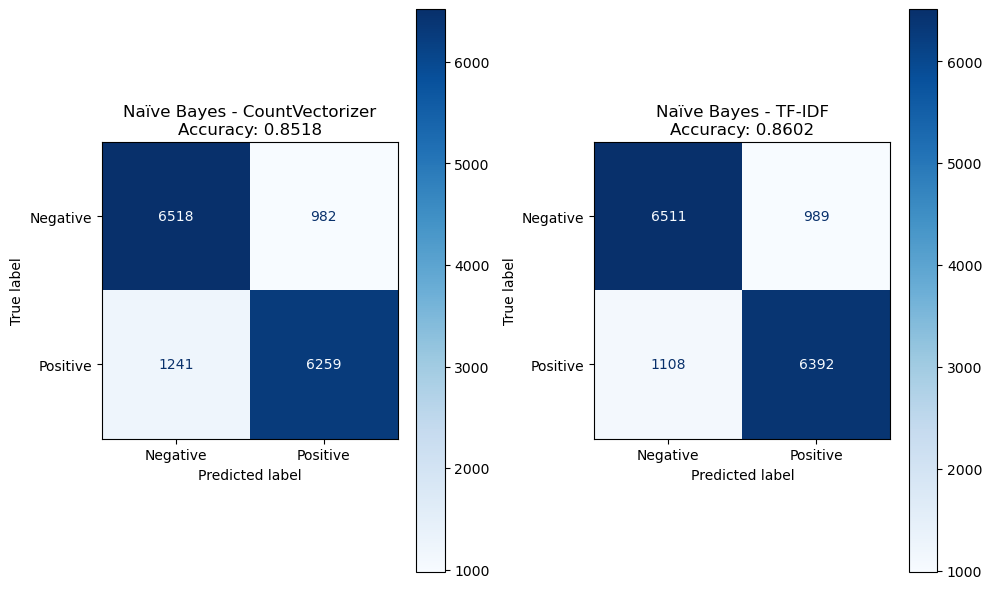

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialisation du modèle Naïve Bayes
nb_bow = MultinomialNB()
nb_tfidf = MultinomialNB()

# Entraînement des modèles
nb_bow.fit(X_train_review_bow, y_train)
nb_tfidf.fit(X_train_review_tfidf, y_train)

# Prédiction sur les données de test
y_pred_bow_nb = nb_bow.predict(X_test_review_bow)
y_pred_tfidf_nb = nb_tfidf.predict(X_test_review_tfidf)

# Calcul des matrices de confusion
cm_bow_nb = confusion_matrix(y_test, y_pred_bow_nb)
cm_tfidf_nb = confusion_matrix(y_test, y_pred_tfidf_nb)

# Calcul des accuracies
accuracy_bow_nb = accuracy_score(y_test, y_pred_bow_nb)
accuracy_tfidf_nb = accuracy_score(y_test, y_pred_tfidf_nb)

# Création des sous-graphes
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Matrice de confusion pour CountVectorizer (BOW)
ConfusionMatrixDisplay(cm_bow_nb, display_labels=['Negative', 'Positive']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'Naïve Bayes - CountVectorizer\nAccuracy: {accuracy_bow_nb:.4f}')

# Matrice de confusion pour TF-IDF
ConfusionMatrixDisplay(cm_tfidf_nb, display_labels=['Negative', 'Positive']).plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'Naïve Bayes - TF-IDF\nAccuracy: {accuracy_tfidf_nb:.4f}')


# Ajustement de l'affichage
plt.tight_layout()
plt.show()


L'erreur rencontré (ValueError: Negative values in data passed to MultinomialNB (input X)) est liée à l'utilisation de données avec des valeurs négatives dans un modèle Naïve Bayes. Le modèle MultinomialNB nécessite que les entrées de données soient positives ou négatives en termes de comptage d'événements. Par exemple, dans le cas des représentations BOW et TF-IDF, il ne devrait pas y avoir de valeurs négatives dans les vecteurs.

Cette erreur est souvent rencontrée lorsqu'on essaie d'utiliser Word2Vec, car les vecteurs générés par Word2Vec peuvent contenir des valeurs négatives. Cela pose un problème pour MultinomialNB, qui ne peut pas traiter les valeurs négatives.

Initialisation de SVM
svm bow initialisé
SVM initialisé
svm bow entrainé
SVM entrainé


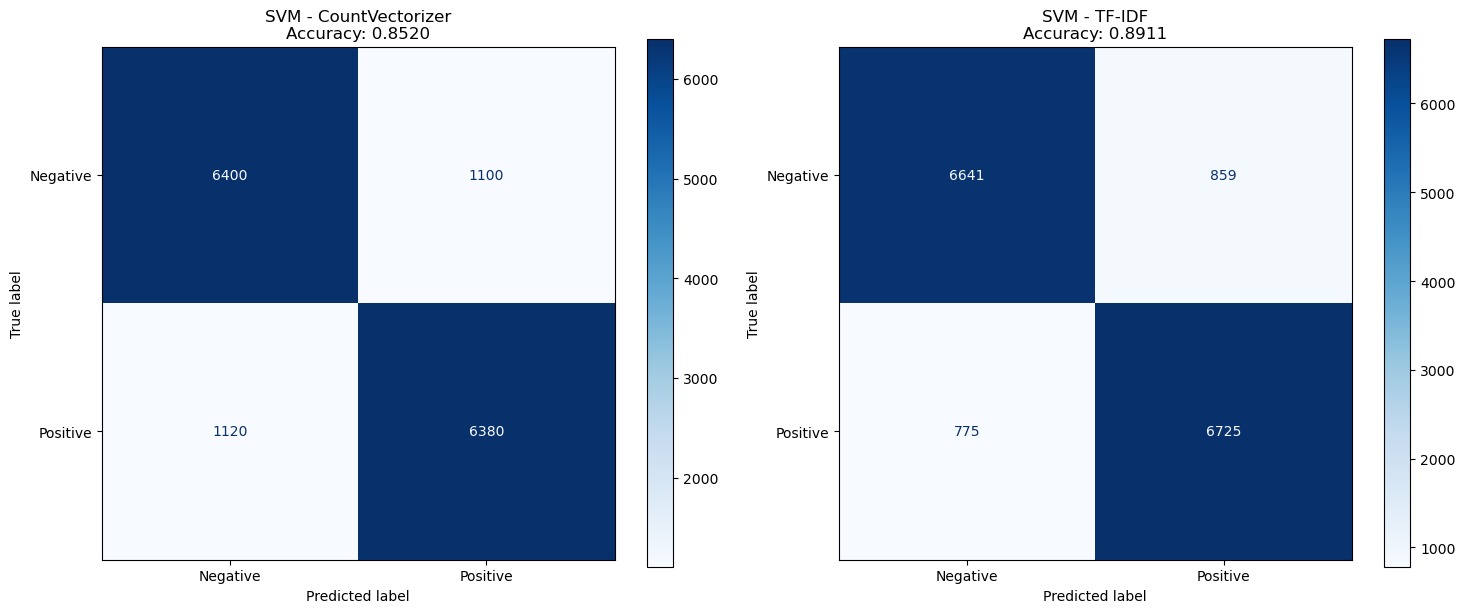

In [48]:
"""  
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Initialisation de SVM")
# Initialisation du modèle SVM
svm_bow = SVC(kernel='linear')
print("svm bow initialisé")
svm_tfidf = SVC(kernel='linear')
#svm_w2v = SVC(kernel='linear')
print("SVM initialisé")
# Entraînement des modèles SVM avec les représentations BOW, TF-IDF et Word2Vec
svm_bow.fit(X_train_review_bow, y_train)
print("svm bow entrainé")
svm_tfidf.fit(X_train_review_tfidf, y_train)
#svm_w2v.fit(X_train_review_w2v, y_train)  # Utilisez la variable de votre modèle Word2Vec
print("SVM entrainé")
# Prédiction sur les données de test
y_pred_bow_svm = svm_bow.predict(X_test_review_bow)
y_pred_tfidf_svm = svm_tfidf.predict(X_test_review_tfidf)
#y_pred_w2v_svm = svm_w2v.predict(X_test_review_w2v) 
# Calcul des matrices de confusion
cm_bow_svm = confusion_matrix(y_test, y_pred_bow_svm)
cm_tfidf_svm = confusion_matrix(y_test, y_pred_tfidf_svm)
#cm_w2v_svm = confusion_matrix(y_test, y_pred_w2v_svm)

# Calcul des accuracies
accuracy_bow_svm = accuracy_score(y_test, y_pred_bow_svm)
accuracy_tfidf_svm = accuracy_score(y_test, y_pred_tfidf_svm)
#accuracy_w2v_svm = accuracy_score(y_test, y_pred_w2v_svm)

# Création des sous-graphes pour afficher les matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matrice de confusion pour CountVectorizer (BOW)
ConfusionMatrixDisplay(cm_bow_svm, display_labels=['Negative', 'Positive']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'SVM - CountVectorizer\nAccuracy: {accuracy_bow_svm:.4f}')

# Matrice de confusion pour TF-IDF
ConfusionMatrixDisplay(cm_tfidf_svm, display_labels=['Negative', 'Positive']).plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'SVM - TF-IDF\nAccuracy: {accuracy_tfidf_svm:.4f}')

# Matrice de confusion pour Word2Vec
#ConfusionMatrixDisplay(cm_w2v_svm, display_labels=['Negative', 'Positive']).plot(ax=axes[2], cmap='Blues')
#axes[2].set_title(f'SVM - Word2Vec\nAccuracy: {accuracy_w2v_svm:.4f}')

# Ajustement de l'affichage
plt.tight_layout()
plt.show()
"""

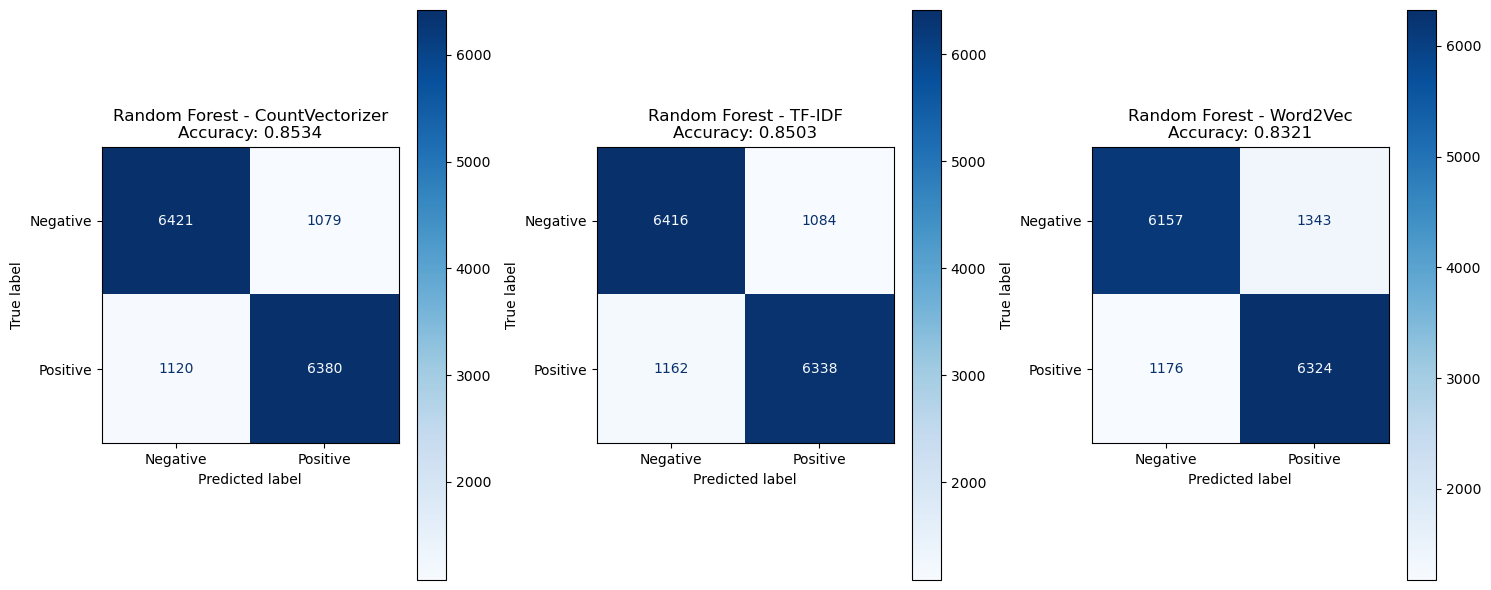

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialisation du modèle Random Forest
rf_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_w2v = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement des modèles Random Forest avec les représentations BOW, TF-IDF et Word2Vec
rf_bow.fit(X_train_review_bow, y_train)
rf_tfidf.fit(X_train_review_tfidf, y_train)
rf_w2v.fit(X_train_review_w2v, y_train)  

# Prédiction sur les données de test
y_pred_bow_rf = rf_bow.predict(X_test_review_bow)
y_pred_tfidf_rf = rf_tfidf.predict(X_test_review_tfidf)
y_pred_w2v_rf = rf_w2v.predict(X_test_review_w2v) 

# Calcul des matrices de confusion
cm_bow_rf = confusion_matrix(y_test, y_pred_bow_rf)
cm_tfidf_rf = confusion_matrix(y_test, y_pred_tfidf_rf)
cm_w2v_rf = confusion_matrix(y_test, y_pred_w2v_rf)

# Calcul des accuracies
accuracy_bow_rf = accuracy_score(y_test, y_pred_bow_rf)
accuracy_tfidf_rf = accuracy_score(y_test, y_pred_tfidf_rf)
accuracy_w2v_rf = accuracy_score(y_test, y_pred_w2v_rf)

# Création des sous-graphes pour afficher les matrices de confusion
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Matrice de confusion pour CountVectorizer (BOW)
ConfusionMatrixDisplay(cm_bow_rf, display_labels=['Negative', 'Positive']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title(f'Random Forest - CountVectorizer\nAccuracy: {accuracy_bow_rf:.4f}')

# Matrice de confusion pour TF-IDF
ConfusionMatrixDisplay(cm_tfidf_rf, display_labels=['Negative', 'Positive']).plot(ax=axes[1], cmap='Blues')
axes[1].set_title(f'Random Forest - TF-IDF\nAccuracy: {accuracy_tfidf_rf:.4f}')

# Matrice de confusion pour Word2Vec
ConfusionMatrixDisplay(cm_w2v_rf, display_labels=['Negative', 'Positive']).plot(ax=axes[2], cmap='Blues')
axes[2].set_title(f'Random Forest - Word2Vec\nAccuracy: {accuracy_w2v_rf:.4f}')

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


In [51]:
!pip install PrettyTable

  Obtaining dependency information for PrettyTable from https://files.pythonhosted.org/packages/8c/37/f687efd8760c183787ff16a61ec9e3515355178271f33fd7c14bf42e338c/prettytable-3.15.1-py3-none-any.whl.metadata


In [59]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Accuracy']
x.add_row(['Bow', 'Logistic Regression', str(round(accuracy_bow,4))+'%'])
x.add_row(['TFIDF', 'Logistic Regression', str(round(accuracy_tfidf,4))+'%'])
x.add_row(['Word2vec', 'Logistic Regression', str(accuracy_w2v)+'%'])
x.add_row(['BOW', 'Naive Bayes', str(accuracy_bow_nb)+'%'])
x.add_row(['TFIDF', 'Naive Bayes', str(accuracy_tfidf_nb)+'%'])
x.add_row(['BOW', 'Random Forest', str(accuracy_bow_rf)+'%'])
x.add_row(['TFIDF', 'Random Forest', str(round(accuracy_tfidf_rf,4))+'%'])
x.add_row(['Word2vec', 'Random Forest', str(round(accuracy_tfidf_rf,4))+'%'])

print(x)

+------------+---------------------+----------+
| Vectorizer |        Model        | Accuracy |
+------------+---------------------+----------+
|    Bow     | Logistic Regression | 0.8771%  |
|   TFIDF    | Logistic Regression | 0.8893%  |
|  Word2vec  | Logistic Regression | 0.8608%  |
|    BOW     |     Naive Bayes     | 0.8518%  |
|   TFIDF    |     Naive Bayes     | 0.8602%  |
|    BOW     |    Random Forest    | 0.8534%  |
|   TFIDF    |    Random Forest    | 0.8503%  |
|  Word2vec  |    Random Forest    | 0.8503%  |
+------------+---------------------+----------+
